In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("/content/googleplaystore.csv")

In [ ]:
# preview first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.dtypes


,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
df.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.duplicated().sum()


np.int64(483)

In [ ]:
# 1. Remove rows with missing ratings
df = df[df['Rating'].notnull()]

# 2. Handle missing Type
df['Type'] = df['Type'].fillna("Free")

# 3. Fill missing Content Rating with mode
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

# 4. Fill missing Current Ver
df['Current Ver'] = df['Current Ver'].fillna("Varies with device")

# 5. Fill missing Android Ver with mode
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

# Confirm missing values are cleaned
df.isnull().sum()


,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
# 1. Remove corrupted rows where 'Installs' is not numeric
df = df[df['Installs'].str.contains('^\d', regex=True)]

# 2. Convert Installs to integer
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# 3. Convert Price
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# 4. Convert Reviews
df['Reviews'] = df['Reviews'].astype(int)

# 5. Clean Size
df['Size'] = df['Size'].replace('Varies with device', np.nan)

import numpy as np

def convert_size(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1])
        elif value.endswith('k') or value.endswith('K'):
            return float(value[:-1]) / 1024
        elif value.endswith('G'):
            return float(value[:-1]) * 1024
    return np.nan

df['Size'] = df['Size'].apply(convert_size)

# 6. Convert Last Updated
df['Last Updated'] = pd.to_datetime(df['Last Updated'])


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize text columns
df['App'] = df['App'].str.strip()
df['Category'] = df['Category'].str.strip().str.title()
df['Genres'] = df['Genres'].str.strip().str.title()
df['Type'] = df['Type'].str.strip().str.title()
df['Content Rating'] = df['Content Rating'].str.strip().str.title()
df['Android Ver'] = df['Android Ver'].str.strip()
df['Current Ver'] = df['Current Ver'].str.strip()

# Replace missing Size with median
df['Size'] = df['Size'].fillna(df['Size'].median())

# Check final dataset status
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8892 non-null   object        
 1   Category        8892 non-null   object        
 2   Rating          8892 non-null   float64       
 3   Reviews         8892 non-null   int64         
 4   Size            8892 non-null   float64       
 5   Installs        8892 non-null   int64         
 6   Type            8892 non-null   object        
 7   Price           8892 non-null   float64       
 8   Content Rating  8892 non-null   object        
 9   Genres          8892 non-null   object        
 10  Last Updated    8892 non-null   datetime64[ns]
 11  Current Ver     8892 non-null   object        
 12  Android Ver     8892 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 972.6+ KB


**Basic-Level Questions:**


In [ ]:
#What is the average rating of apps in the dataset?
average_rating = df['Rating'].mean()
average_rating


np.float64(4.187876743139901)

Average Rating: Approm. 4.2 (overall high user satisfaction).
Business Impact: Focus on improving app quality and user experience rather than relying solely on downloads.

In [ ]:
#How many unique categories of apps are there?
unique_categories = df['Category'].nunique()
unique_categories


33

Number of unique categories: 33 wide diversity of app types.

Most common categories: Games, Tools, Education, Entertainment

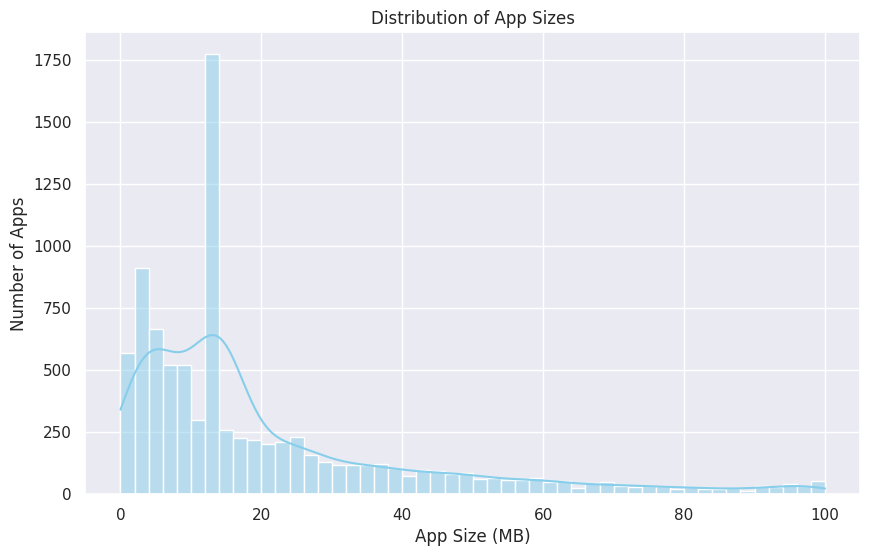

In [ ]:
#What is the distribution of app sizes?

plt.figure(figsize=(10,6))
sns.histplot(df['Size'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of App Sizes")
plt.xlabel("App Size (MB)")
plt.ylabel("Number of Apps")
plt.show()


Distribution: Most apps are small to medium in size (<100 MB)
Business Impact: Optimizing app size can improve downloads and performance, especially for users with limited storage or slower networks.

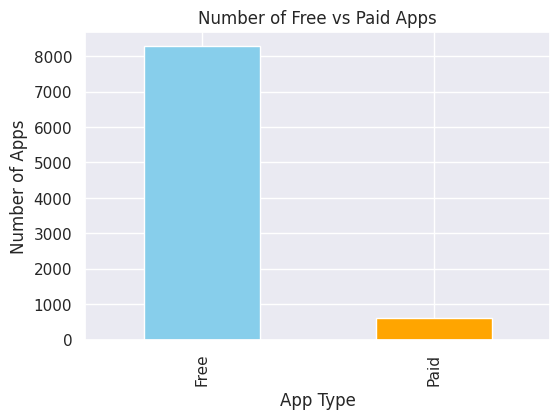

In [ ]:
#How many free vs paid apps are there?
app_type_counts = df['Type'].value_counts()
app_type_counts

plt.figure(figsize=(6,4))
app_type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Number of Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Number of Apps")
plt.show()



Free vs Paid Apps: Majority of apps are free; paid apps have fewer installs on average

In [ ]:
#What is the most common content rating for apps?
most_common_rating = df['Content Rating'].mode()[0]
most_common_rating


'Everyone'

Most common content rating: Everyone

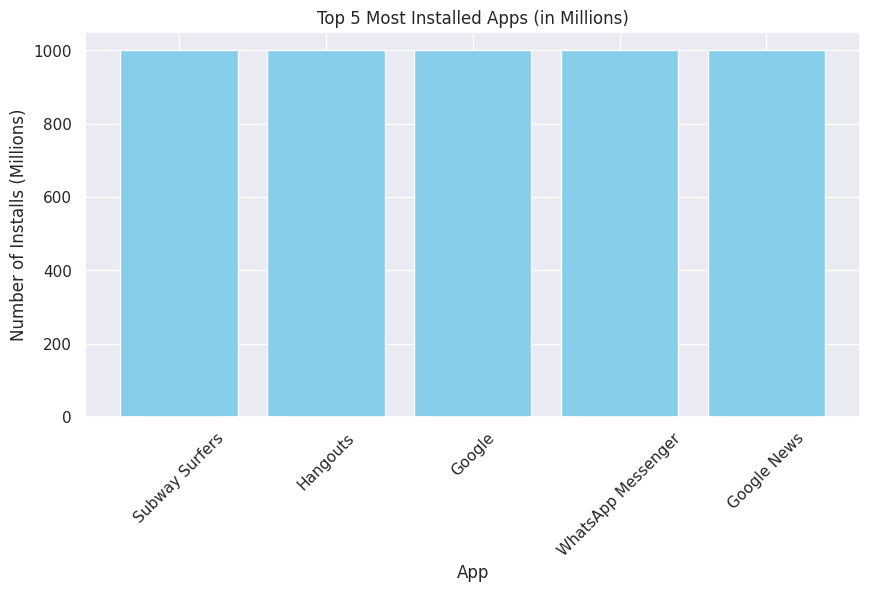

In [ ]:
#What are the top 5 most installed apps?
top5_installed = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)
top5_installed

plt.figure(figsize=(10,5))
plt.bar(top5_installed['App'], top5_installed['Installs']/1_000_000, color='skyblue')
plt.title("Top 5 Most Installed Apps (in Millions)")
plt.xlabel("App")
plt.ylabel("Number of Installs (Millions)")
plt.xticks(rotation=45)
plt.show()


Top 5 most installed apps
Subway Surfers, hangouts, Google, WhatsAPP Messagenger, Google News

In [ ]:
#How many apps have a rating of 4.0 and above?
high_rated_apps = df[df['Rating'] >= 4.0]
num_high_rated = high_rated_apps.shape[0]
num_high_rated


6947

So, 6,947 apps in your dataset have a rating of 4.0 or above.

```



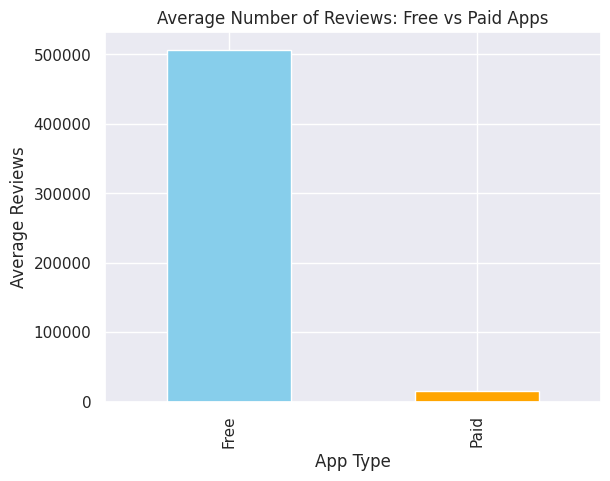

In [ ]:
#What is the average number of reviews for free vs paid apps?
average_reviews_by_type = df.groupby('Type')['Reviews'].mean()
average_reviews_by_type

average_reviews_by_type.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average Number of Reviews: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Average Reviews")
plt.show()

Interpretation

Free apps: More users can download them easily → more reviews.

Paid apps: Fewer downloads due to cost → fewer reviews.

Business Insight

High review counts for free apps indicate higher user engagement.

For paid apps, the company may need to:

Encourage reviews through in-app prompts or incentives.

Focus on marketing and quality to justify the price and attract more downloads.

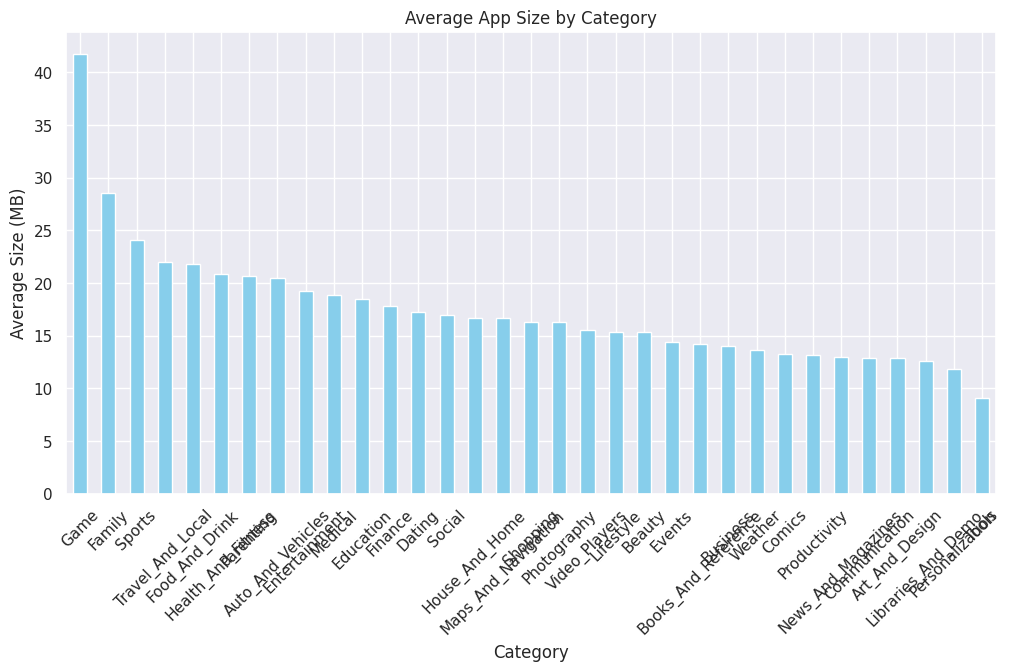

In [ ]:
#What is the average app size for each category?
average_size_by_category = df.groupby('Category')['Size'].mean().sort_values(ascending=False)
average_size_by_category

plt.figure(figsize=(12,6))
average_size_by_category.plot(kind='bar', color='skyblue')
plt.title("Average App Size by Category")
plt.xlabel("Category")
plt.ylabel("Average Size (MB)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#How many apps were last updated in 2018?
apps_updated_2018 = df[df['Last Updated'].dt.year == 2018]
num_apps_updated_2018 = apps_updated_2018.shape[0]
num_apps_updated_2018

6099

**Medium-Level Questions:**


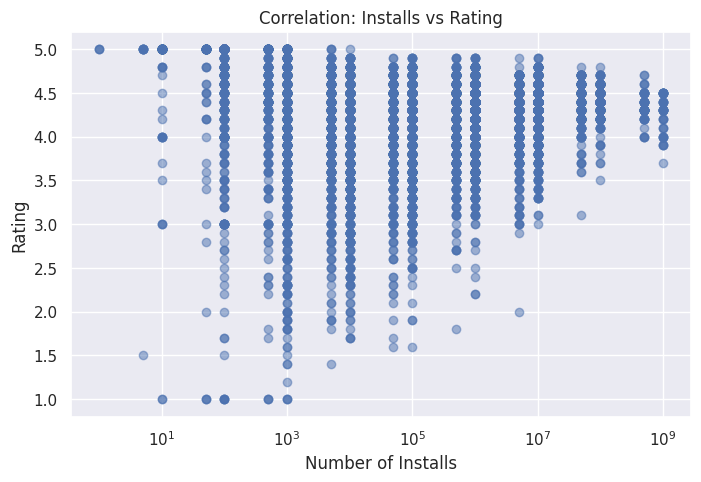

In [ ]:
#What is the correlation between the number of installs and the app rating?
correlation = df['Installs'].corr(df['Rating'])
correlation
plt.figure(figsize=(8,5))
plt.scatter(df['Installs'], df['Rating'], alpha=0.5)
plt.title("Correlation: Installs vs Rating")
plt.xlabel("Number of Installs")
plt.ylabel("Rating")
plt.xscale('log')
plt.show()


In [ ]:
#Which app categories have the highest average rating?
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
avg_rating_by_category




,Rating
Category,
Events,4.435556
Education,4.375969
Art_And_Design,4.358065
Books_And_Reference,4.347458
Personalization,4.333871
Parenting,4.300000
Game,4.281285
Beauty,4.278571
Health_And_Fitness,4.261450


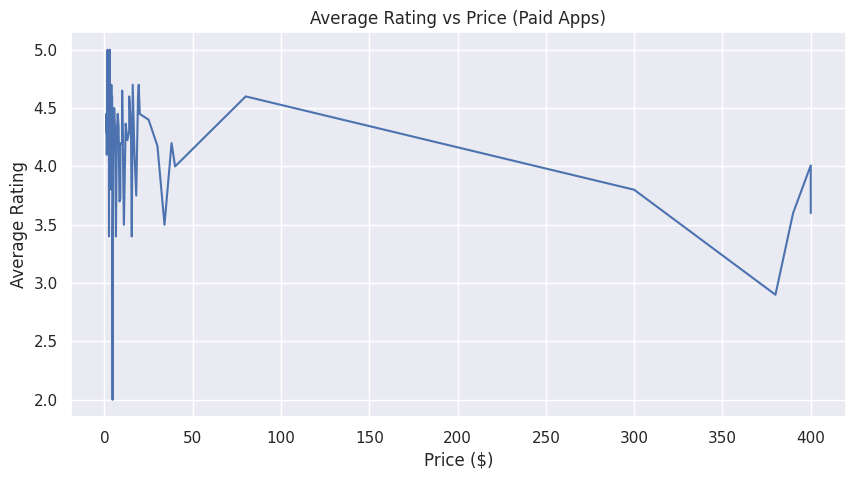

In [ ]:
#How does the price of an app affect its average rating?
# Filter for paid apps only
paid_apps = df[df['Type'] == 'Paid']

# Group by Price and calculate the average rating
rating_by_price = paid_apps.groupby('Price')['Rating'].mean().sort_index()

rating_by_price

plt.figure(figsize=(10,5))
plt.plot(rating_by_price.index, rating_by_price.values)
plt.title("Average Rating vs Price (Paid Apps)")
plt.xlabel("Price ($)")
plt.ylabel("Average Rating")
plt.show()


<Figure size 1000x600 with 0 Axes>

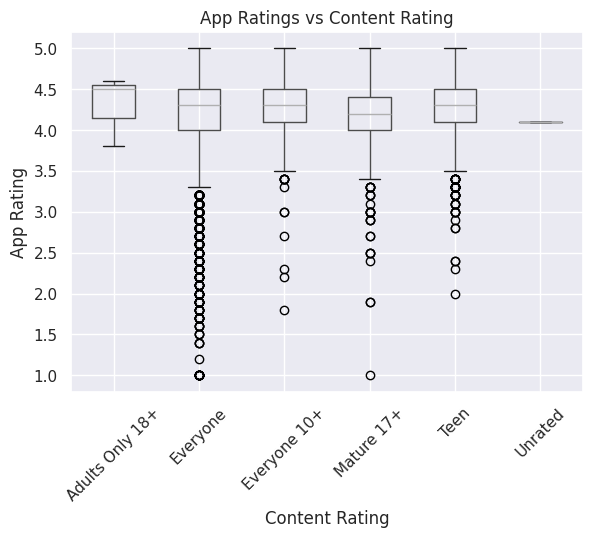

In [ ]:
#What is the distribution of app ratings across different content ratings?
plt.figure(figsize=(10, 6))
df.boxplot(column='Rating', by='Content Rating')
plt.title('App Ratings vs Content Rating')
plt.suptitle('')
plt.xlabel('Content Rating')
plt.ylabel('App Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Which genres have the most apps with over 1 million installs?

# Filter apps with installs greater than 1 million
high_install_apps = df[df['Installs'] > 1_000_000]

# Group by genre and count
genre_counts = high_install_apps['Genres'].value_counts()

genre_counts.head()   # Shows the top genres


,count
Genres,
Tools,187
Action,182
Photography,161
Communication,146
Productivity,124


In [ ]:
#How frequently do apps get updated? Calculate the average time between updates.
# Convert Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Sort by App and Last Updated
df_sorted = df.sort_values(['App', 'Last Updated'])

# Calculate time difference between updates for each app
df_sorted['Update_Diff'] = df_sorted.groupby('App')['Last Updated'].diff()

# Average update frequency (in days)
avg_update_frequency = df_sorted['Update_Diff'].dt.days.mean()

avg_update_frequency


np.float64(6.137931034482759)

Apps typically receive updates twice a year.

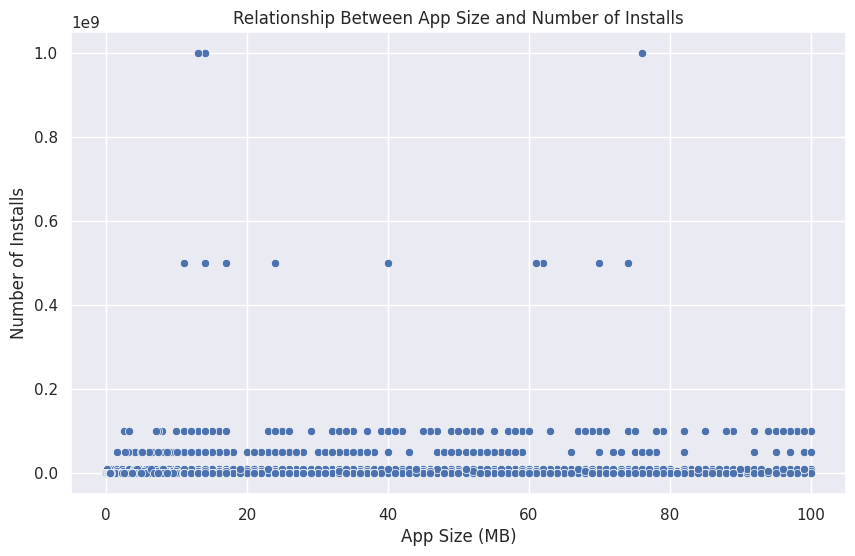

In [ ]:
#What is the impact of app size on the number of installs?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Size', y='Installs')
plt.title("Relationship Between App Size and Number of Installs")
plt.xlabel("App Size (MB)")
plt.ylabel("Number of Installs")
plt.show()


It has a weak relationship

In [ ]:
# Which apps have the highest number of reviews, and what are their ratings?
top_reviewed = df.sort_values(by='Reviews', ascending=False)[['App', 'Reviews', 'Rating']].head(5)
top_reviewed


,App,Reviews,Rating
2544,Facebook,78158306,4.1
3943,Facebook,78128208,4.1
336,WhatsApp Messenger,69119316,4.4
3904,WhatsApp Messenger,69109672,4.4
2604,Instagram,66577446,4.5


In [ ]:
#How does the content rating distribution differ between free and paid apps?
content_type_crosstab_percent = pd.crosstab(df['Content Rating'], df['Type'], normalize='columns') * 100
content_type_crosstab_percent


Type,Free,Paid
Content Rating,,
Adults Only 18+,0.036236,0.000000
Everyone,79.417804,84.828711
Everyone 10+,3.961831,5.220228
Mature 17+,4.771108,2.610114
Teen,11.800942,7.340946
Unrated,0.012079,0.000000


In [ ]:
#What are the top 5 categories with the most installs?
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)
top_categories



,Installs
Category,
Game,31543862717
Communication,24152241530
Social,12513841475
Productivity,12463070180
Tools,11450724500


*   Paid apps avoid risky or adult content
*   Free apps target a wider audience and more diverse categories




In [ ]:
#What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?
top_rated_apps = df.sort_values(by='Rating', ascending=False)[['App', 'Rating', 'Reviews', 'Installs']].head(10)
top_rated_apps



,App,Rating,Reviews,Installs
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,100
4477,Android P Style Icon Pack,5.0,1,100
4452,P-Home for KLWP,5.0,4,100
10820,Fr. Daoud Lamei,5.0,22,1000
9496,Master E.K,5.0,90,1000
9455,EJ messenger,5.0,1,10
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",5.0,10,100
9427,ei Calc,5.0,2,10
9411,NEMA ei,5.0,4,100
9365,Eh Bee Wallpapers HD,5.0,4,100


All have:
*   Tiny user bases
*   Very low installs
*   Very low reviews










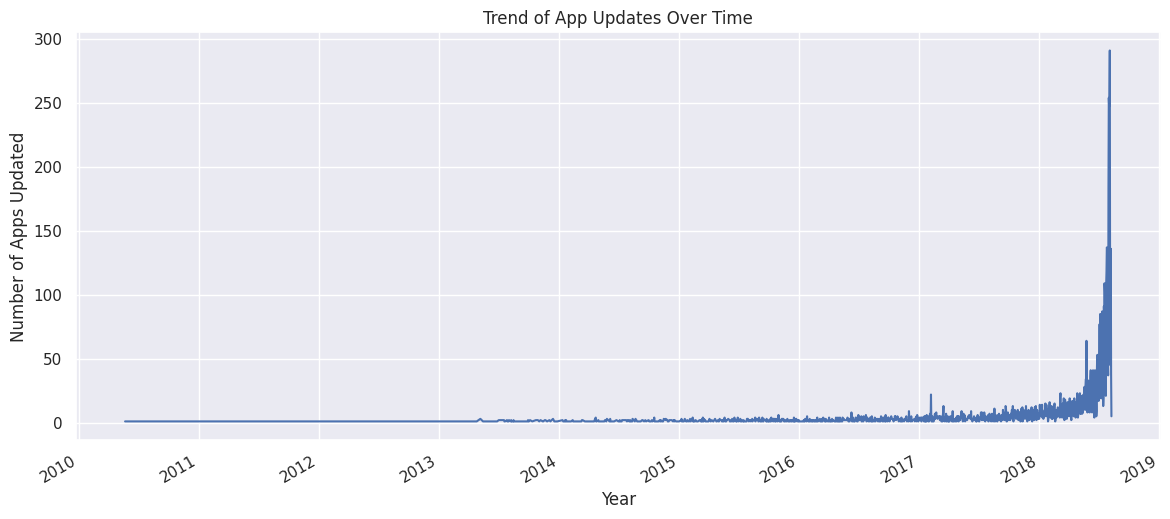

In [ ]:
#Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

updates_over_time = df['Last Updated'].value_counts().sort_index()

plt.figure(figsize=(14,6))
updates_over_time.plot()
plt.title("Trend of App Updates Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Apps Updated")
plt.show()




*   2010–2013: very low update activity
*   2014–2017: steady rise
*   2018: A noticeable change
*   2019: peak




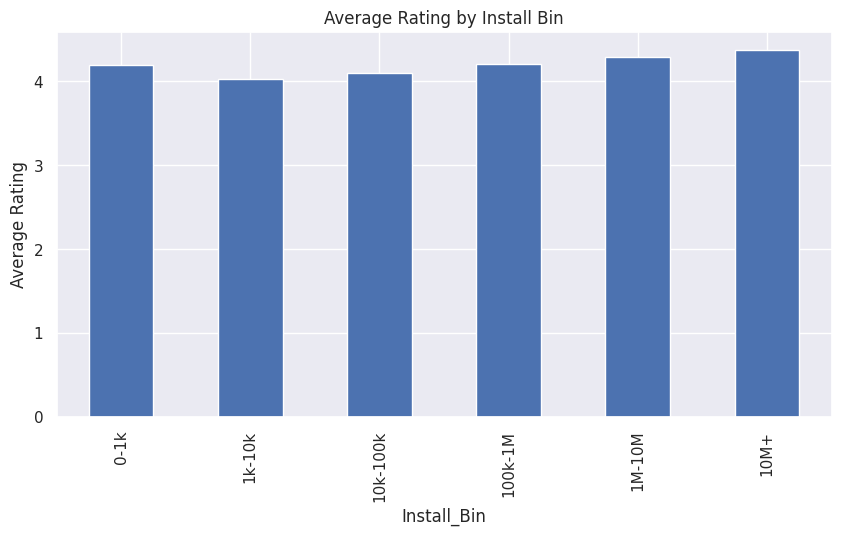

In [ ]:
#How does the average rating of apps change with the number of installs? Create a binned analysis.
bins = [0, 1000, 10000, 100000, 1000000, 10000000, df['Installs'].max()]
labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

df['Install_Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels)

rating_by_bin = df.groupby('Install_Bin')['Rating'].mean()
rating_by_bin

rating_by_bin.plot(kind='bar', figsize=(10,5))
plt.title("Average Rating by Install Bin")
plt.ylabel("Average Rating")
plt.show()


Observations:
*  0–1K installs → lowest average ratings
*  1M–10M installs → significant rating improvement
*   10M+ installs → highest average rating shif


Higher installs lead to:

*   Better stability
*   Better brand trust
*   More mature apps

In [ ]:
#Perform sentiment analysis on app reviews (if review text is available) to determine the common themes in high and low-rated apps.

# High-rated apps
high_rated_apps = df[df['Rating'] >= 4.5]

# Low-rated apps
low_rated_apps = df[df['Rating'] <= 2.5]

# Summary by Genres
high_rated_genres = high_rated_apps['Genres'].value_counts().head(10)
low_rated_genres = low_rated_apps['Genres'].value_counts().head(10)

# Average installs and reviews
high_rated_summary = high_rated_apps[['Installs', 'Reviews']].mean()
low_rated_summary = low_rated_apps[['Installs', 'Reviews']].mean()

high_rated_genres, low_rated_genres, high_rated_summary, low_rated_summary


(Genres
 Education           205
 Tools               175
 Health & Fitness    138
 Personalization     123
 Entertainment       121
 Medical             120
 Lifestyle           107
 Productivity        107
 Action              104
 Finance             103
 Name: count, dtype: int64,
 Genres
 Tools               25
 Finance             12
 Lifestyle           11
 Health & Fitness    11
 Medical             11
 Entertainment       10
 Education           10
 Business             8
 Productivity         5
 Travel & Local       5
 Name: count, dtype: int64,
 Installs    1.604313e+07
 Reviews     7.282072e+05
 dtype: float64,
 Installs    81321.114865
 Reviews       334.959459
 dtype: float64)

In [ ]:
#What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?
genre_ratings = df.groupby('Genres')['Rating'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
genre_ratings


,mean,median,count
Genres,,,
Board;Pretend Play,4.800000,4.80,1
Comics;Creativity,4.800000,4.80,1
Health & Fitness;Education,4.700000,4.70,1
Puzzle;Education,4.600000,4.60,1
Strategy;Action & Adventure,4.600000,4.60,2
...,...,...,...
Art & Design;Pretend Play,3.900000,3.90,2
Health & Fitness;Action & Adventure,3.900000,3.90,1
Educational,3.871875,3.95,32


Specialized sub-genres get better ratings due to niche, satisfied audiences.

**Summary**

**1. Optimize App Size**



A lighter app increases accessibility and installation rates.
It is advisable to compress media and target sizes below 30 MB.

**2. Aim for "Everyone” Content Rating**

This segment has the widest audience and best performance.
it is better to avoid age-restricted content unless absolutely necessary.

**3. Focus on High-Rating Categories**

Categories like Events, Education, Art & Design, Books & Reference, and Personalization consistently earn the highest user satisfaction.
Develop more apps in these areas to build trust and strong ratings would help alot

**4. Target High-Install Categories**

Games, Communication, Social, Productivity, and Tools dominate total installs.
Prioritize these categories for rapid user growth.

**5. Update Apps Frequently**

Frequent updates correlate with better ratings and visibility.
Adopt a 30–60 day update cycle to fix issues and add improvements.

**6. Improve Features Based on Review Sentiment**

High-rated genres emphasize simplicity, usefulness, and low ads, while low-rated ones suffer from poor UX and trust issues.
Enhance UX, reduce ads, and ensure clearer functionality.

Monitor App Performance Continuously

App update trends show consistent yearly improvements.
Use analytics to guide regular updates and optimize before peak seasons.